In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import ks_2samp
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in ve

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\Data\\data_after_clean\\all_report_ver1.csv")
df = df.rename(index=str, columns={"cung_mang": "same_network_operator"})
# df['callto_callin'] = (df.call_to)/(df.call_in+0.00000001)
# df['calltomiss_callinmiss'] = (df.call_to_miss)/(df.call_in_miss+0.00000001)
# del df['call_to']
# del df['call_in']
# del df['call_to_miss']
# del df['call_in_miss']
# del df['in_hour']
del df['duration_call_to']
del df['duration_call_in']
del df['index']
# features=['phone','callto_callin','avg_duration_call_to','avg_duration_call_in','avg_in_contact','avg_success','same_network_operator','label_report']
# df = df[features]
df

,phone,call_to,call_in,call_to_miss,call_in_miss,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success,same_network_operator,sum_report,Spam
0,842257300111,4,1,0,0,72.748181,483.951605,1.00000,5,1.000000,0,1,1
1,842361091,1,15,255,5,0.000000,18.466544,0.01087,218,0.043478,1,2,1
2,842363823151,1,1,0,0,16.998300,48.995100,0.50000,2,1.000000,0,2,1
3,842369996868,0,3,27,4,0.000000,9.666344,0.00000,23,0.088235,0,1,1
4,842369999014,2,0,0,0,20.998950,0.000000,0.00000,2,1.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056,88165621587,1,0,0,1,68.993101,0.000000,0.00000,2,0.500000,0,1,1
7057,886975617,27,0,2,0,12.740694,0.000000,0.00000,16,0.931034,0,1,1
7058,905356262146,1,0,0,0,0.000000,0.000000,0.00000,1,0.000000,1,1,1
7059,943473882,1,0,0,0,0.999900,0.000000,0.00000,0,0.000000,0,1,1


In [3]:
X = df.drop(columns=['phone','sum_report','Spam'])
y = df['Spam']

In [4]:
scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
# # the result of the transforma
# # scaler = MinMaxScaler()
# # norm_df = pd.DataFrame(scaler.fit_transform(X), index=X.index,
# # columns=X.columns)
df_norm = pd.concat([norm_df,y],axis=1)
df_norm

,call_to,call_in,call_to_miss,call_in_miss,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success,same_network_operator,Spam
0,-0.191279,0.023058,-0.473057,-0.237241,0.572599,10.220162,3.700708,-0.354879,2.344469,-0.458282,1
1,-0.360664,3.132650,9.741665,0.490582,-0.634922,0.245268,-0.247504,5.650917,-1.116807,-0.426703,1
2,-0.360664,0.023058,-0.473057,-0.237241,-0.352774,0.899465,1.704909,-0.439467,2.344469,-0.458282,1
3,-0.417126,0.467285,0.608502,0.345017,-0.634922,0.056688,-0.290891,0.152653,-0.954849,-0.458282,1
4,-0.304203,-0.199056,-0.473057,-0.237241,-0.286368,-0.150452,-0.290891,-0.439467,2.344469,-0.458282,1
...,...,...,...,...,...,...,...,...,...,...,...
7056,-0.360664,-0.199056,-0.473057,-0.091676,0.510270,-0.150452,-0.290891,-0.439467,0.535166,-0.458282,1
7057,1.107341,-0.199056,-0.392941,-0.237241,-0.423444,-0.150452,-0.290891,-0.044720,2.094910,-0.458282,1
7058,-0.360664,-0.199056,-0.473057,-0.237241,-0.634922,-0.150452,-0.290891,-0.467664,-1.274138,-0.426703,1
7059,-0.360664,-0.199056,-0.473057,-0.237241,-0.618325,-0.150452,-0.290891,-0.495860,-1.274138,-0.458282,1


In [5]:
from sklearn.cluster import DBSCAN
X = df_norm.drop(columns=['Spam'])
Y = df_norm['Spam']

In [6]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=16)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

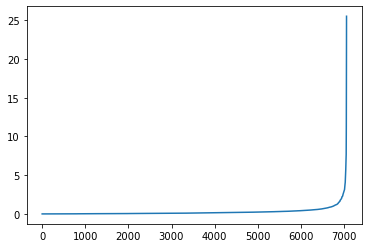

In [7]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
# distances
plt.plot(distances)

0.5476754974944988


<Figure size 360x360 with 0 Axes>

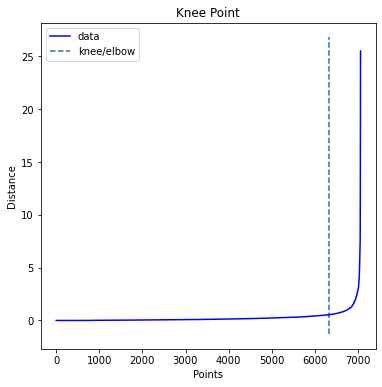

In [8]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [9]:
type(distances)

numpy.ndarray

In [10]:
db = DBSCAN(eps=1.14, min_samples=10)
db.fit(X)
y_DBSCAN = db.fit_predict(X)

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px


tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=y_DBSCAN
)
fig.show()

In [ ]:
X_copy = X.copy()
X_copy['cluster'] = y_DBSCAN

In [ ]:
X_copy.groupby(['cluster']).count()

In [ ]:
X_hdbscan = []
for i in range(-1,len(X_copy.cluster.unique())-1):
    X_hdbscan.append(X_copy.loc[X_copy.cluster == i])


In [ ]:
from sklearn.manifold import TSNE
import plotly.graph_objects as go
T = TSNE(n_components=3).fit_transform(np.concatenate([X_hdbscan[0].drop(columns = ['cluster']), X_hdbscan[1].drop(columns = ['cluster']), X_hdbscan[2].drop(columns = ['cluster'])]))

sep = np.cumsum([0] + [len(X_hdbscan[i]) for i in range(len(X_hdbscan))])

fig = go.Figure()

for i in range(len(X_copy.cluster.unique())):
    fig.add_trace(
        go.Scatter3d(x=T[sep[i]:sep[i+1]][:, 0],
                     y=T[sep[i]:sep[i+1]][:, 1],
                     z=T[sep[i]:sep[i+1]][:, 2],
                     mode='markers',
                     marker=dict(color=i, size=2)))
fig.show()
fig.write_html("6label_tSNE.html")

In [ ]:
df

In [ ]:
df['sum_call'] = df.call_to + df.call_in 
df['call_div_report'] = df.sum_call / df.sum_report

In [ ]:
df.describe()

In [ ]:
x = range(0,len(df.loc[(df.call_div_report < 15)]))
plt.plot(x, df.loc[(df.call_div_report < 15)].sort_values(by=['sum_call']).sum_call)
plt.plot(x, df.loc[(df.call_div_report < 15)].sort_values(by=['sum_call']).sum_report)
plt.xlabel('phone')
plt.ylabel('sum')
plt.title('sum_call và sum_report')
plt.legend(['sum_call', 'sum_report'])
plt.show()

In [ ]:
a =df.loc[(df.call_div_report > 6)].sort_values(by=['call_div_report'])
a

In [ ]:
a.loc[a.sum_report > 3]

In [ ]:
x = range(0,len(a))
plt.plot(x, a.sum_call)
plt.plot(x, a.sum_report)
plt.xlabel('phone')
plt.ylabel('sum')
plt.title('sum_call và sum_report')
plt.legend(['sum_call', 'sum_report'])
plt.show()

In [ ]:
plt.plot(x, a.sum_report)

In [ ]:
plt.plot(x, y)

In [ ]:
from kneed import KneeLocator
y = a.sort_values(by=['sum_call']).sum_call
x = range(0,len(a))
y= y.reset_index()
b= y.sum_call
kl = KneeLocator(x,y.sum_call, curve="convex", direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
kl.plot_knee()
plt.xlabel("Points")
plt.ylabel("Sum_call")


In [ ]:
index = df.loc[(df.call_div_report > 5)].index

In [ ]:
df.index

In [ ]:
df['select'] = 0

In [ ]:
df.loc[index,'select']=1

In [ ]:
df

In [ ]:
df.loc[df.select == 0].describe()

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy=df_copy.sort_values(by=['call_div_report'])

In [ ]:
df_copy

In [ ]:
x = range(0,len(df))
plt.plot(x, df_copy.sum_report)
plt.plot(x, df_copy.call_div_report)
plt.plot(x, df_copy.sum_call)
plt.xlabel('phone')
plt.ylabel('sum')
plt.title('sum_report và call_div_report và sum_call')
plt.legend(['sum_report', 'call_div_report', 'sum_call'])
plt.show()

In [ ]:
plt.plot(x, df_copy.call_div_report)
plt.show()

In [ ]:
plt.plot(x, df_copy.sum_report)
plt.show()

In [ ]:
plt.plot(x, df_copy.sum_call)
plt.show()

In [ ]:
x

In [ ]:
df

In [ ]:
df.to_csv('test.csv')